<a href="https://colab.research.google.com/github/hitmanrj/Projeccts/blob/main/Sentiment_Analysis_NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **importing libraries**


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string
import nltk
import nltk.corpus
import sklearn

from matplotlib import rcParams
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import NaiveBayesClassifier
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from nltk.classify.scikitlearn import SklearnClassifier



**Get the data**

In [ ]:
df=pd.read_csv("/content/Womens Clothing E-Commerce Reviews (1).csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# Data Exploration

In [ ]:
# How many columns are there
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [ ]:
# check the shape of the dataset
df.shape

(23486, 11)

In [ ]:
# Count the number of unique values in each column
df.nunique()

Unnamed: 0                 23486
Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

In [ ]:
# Count the number of nulls in each column
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
# drop all non values
df.dropna(inplace=True)


In [ ]:
# reseat the index after droping some rows
df.reset_index(drop=True, inplace=True)
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [ ]:
# Check for the missing values after droping the null values
df.isnull().sum()


Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

# Data Preprocessing

In [ ]:
# drop unnecessary culomns
df.drop(["Unnamed: 0", "Title", 'Clothing ID'], axis=1, inplace=True)



In [ ]:
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,49,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,39,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In the given dataset we need to use two coulmns to generate text . the "Review Text" to get the  text and  "Recommended IND" to classify the review either positive or negative

In [ ]:
# to remove spaces in columns and replace them with underscore
df.columns= df.columns.str.replace(" ", "_")

In [ ]:
# Create reviews Tuples  to store the words along the categorys
reviews = []
# go through Recommended IND column and get the category and the index
for (index , category) in enumerate(df.Recommended_IND):
    reviews.append((df.Review_Text[index],category)) # Store the review for spacific index with catogory inside texts array
# Print first 4
reviews[0:4]

[('I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
  0),
 ("I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",
  1),
 ('This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!',
  1),
 ('I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress 

**STOPWORDS**
* We need to clean the reviews from stopwords `

In [ ]:
# create lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Create a list of stopwords
stops= stopwords.words("english")
punctuations=list(string.punctuation)
stops=stops+punctuations
stops, string.punctuation

(['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'above',
  'below',
  'to',
  'from',
  'up',
  'down',
  'in',
  'out',
  'on',
  'off',
  'over',
  'under',
  'again',
  'further',
  'th

In [ ]:
# business stopwords
business_stopwords= ["i'm","would", "look", "ordered", "wear", "fit", "one", "fits","bought", "looks", "also", "got", "think", "even",
                     "tried", "get", "could", "made","way","still", "runs","true" ,"right", "see","online","wearing", "however", "design","purchased","feel","go",
                     "enough","model","though","price","looked","person","better","first","going","try", "body" "bottom","time","many","looking","around","thought",
                     "make","wanted","saw","makes","went","find","found","buy","nan","i've", "since","seems","ok", "girl", "woman"]
stops= stops+business_stopwords
stops



['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# stopwords after updated with business_stopwords
len(stops)

273

# **Part-of-Speech Tagging**

In [ ]:
# function to get the simpler virsion of pos tag  to use it in lemmitazation
def get_simple_pos(tag):
    if tag.startswith('N') or tag.startswith('J'):
        return wordnet.NOUN
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN #default case

# **Lemmatization**

In [ ]:
# function to return Limmitzed words and cleaned from stop words
def clean_review(words):
  output_words= []
  words_tokens= nltk.word_tokenize(words)
  for word in words_tokens :

    if word.lower() not in stops:
      pos = pos_tag([word]) # get the part of speech of each word

      clean_word=(lemmatizer.lemmatize(word.lower(), pos=get_simple_pos(tag)) for word, tag in pos)
      output_words.append(', '.join(map(str,clean_word )))
  return output_words

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#Test our function
clean_review("My cats are running away from my arms")

['cat', 'run', 'away', 'arm']

In [ ]:
# clean all reviews
cleaned_reviews= [(clean_review(text),category )for text,category  in reviews]


In [ ]:
len(cleaned_reviews)

19662

In [ ]:
#check first 5 reviews
cleaned_reviews[0:5]

[(['high',
   'hope',
   'dress',
   'really',
   'work',
   'initially',
   'petite',
   'small',
   'usual',
   'size',
   'outrageously',
   'small',
   'small',
   'fact',
   'zip',
   'reorder',
   'petite',
   'medium',
   'ok.',
   'overall',
   'top',
   'half',
   'comfortable',
   'nicely',
   'bottom',
   'half',
   'tight',
   'layer',
   'several',
   'somewhat',
   'cheap',
   'net',
   'layer',
   'imo',
   'major',
   'flaw',
   'net',
   'layer',
   'sewn',
   'directly',
   'zipper',
   'c'],
  0),
 (['love',
   'love',
   'love',
   'jumpsuit',
   "'s",
   'fun',
   'flirty',
   'fabulous',
   'every',
   'nothing',
   'great',
   'compliment'],
  1),
 (['shirt',
   'flatter',
   'due',
   'adjustable',
   'front',
   'tie',
   'perfect',
   'length',
   'legging',
   'sleeveless',
   'pair',
   'well',
   'cardigan',
   'love',
   'shirt'],
  1),
 (['love',
   'tracy',
   'reese',
   'dress',
   'petite',
   '5',
   'foot',
   'tall',
   'usually',
   '0p',
   'bran

**Split the data**
*  75% for traning
*  25% for testing

In [ ]:
#.75% traning = 14746 and 25% testing = 19662-14746 =4916
traning_words=cleaned_reviews[0:14746]
testing_words=cleaned_reviews[14746:]

In [ ]:
print(f"Training Data = {len(traning_words)}")
print(f"Testing Data = {len(testing_words)}")


Training Data = 14746
Testing Data = 4916


In [ ]:
# array contaning all words
words_list=[]
for word in traning_words:
        words_list+=word[0] # 0 index to get only the words

In [ ]:
# Total words in traning data
len(words_list)

392719

In [ ]:
#frequency distribution for all words
freq= nltk.FreqDist(words_list)
# The .most_common() method lists the words which occur most frequently in the data
common=freq.most_common()
# features are an array of only the top words in word list without The number of words
features= [i[0]for i in common]

In [ ]:
print(len(common))
print(len(features))

12805
12805


In [ ]:
# Most common 5 words
common[0:5]

[('dress', 8091), ('size', 7083), ('love', 6701), ("n't", 5543), ('top', 5450)]

In [ ]:
# List of 5 features
features[0:5]

['dress', 'size', 'love', "n't", 'top']

# Showing highest repeating words

<function matplotlib.pyplot.show(close=None, block=None)>

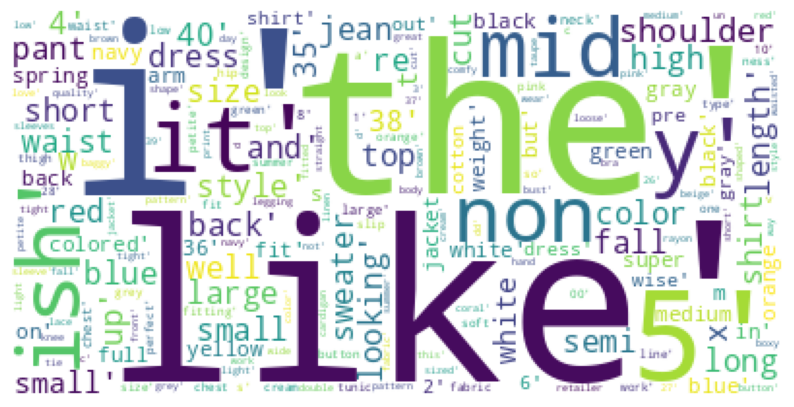

In [ ]:
# Visualizing the highest repeating words (features)

# wordcload is techniqe use to show which words are the most frequent
wordCloud = WordCloud(background_color="white", max_words =3000).generate(str(features))

rcParams["figure.figsize"]= 10,20
plt.imshow(wordCloud)
plt.axis("off")
plt.show

In [ ]:
# function to return a set of the features with true or false
def get_dict_for_feature(words):
  current_features={}
  words_set= set(words)
  for word in features:
    current_features[word] = word in words_set  # if word comes in words set it will return True otherwise False
  return current_features

In [ ]:
featuers_dic= get_dict_for_feature(traning_words[0][0])

In [ ]:
# Dictionary containing all words with True classification if the word is exist in each review otherwise false
featuers_dic

{'dress': True,
 'size': True,
 'love': False,
 "n't": False,
 'top': True,
 "'s": False,
 'like': False,
 'color': False,
 'great': False,
 "'m": False,
 '5': False,
 "''": False,
 'fabric': False,
 'small': True,
 'really': True,
 'perfect': False,
 'little': False,
 'flatter': False,
 'soft': False,
 'well': False,
 'back': False,
 'comfortable': True,
 'nice': False,
 'cute': False,
 'work': True,
 'bit': False,
 'sweater': False,
 'shirt': False,
 'beautiful': False,
 'material': False,
 'large': False,
 'much': False,
 'jean': False,
 'length': False,
 'petite': True,
 'long': False,
 'short': False,
 'waist': False,
 'medium': True,
 'quality': False,
 'retailer': False,
 'x': False,
 'pretty': False,
 'skirt': False,
 'pant': False,
 'store': False,
 'usually': False,
 'sleeve': False,
 '...': False,
 'style': False,
 'good': False,
 'cut': False,
 'big': False,
 'black': False,
 'return': False,
 'super': False,
 'picture': False,
 'say': False,
 'need': False,
 '4': False,
 '

In [ ]:
# create dic for each review which has feature with value and the category
traning_words= [( get_dict_for_feature(words),category ) for words , category in traning_words]
testing_words = [( get_dict_for_feature(words),category ) for words , category in testing_words]

In [ ]:
traning_words[1]

({'dress': False,
  'size': False,
  'love': True,
  "n't": False,
  'top': False,
  "'s": True,
  'like': False,
  'color': False,
  'great': True,
  "'m": False,
  '5': False,
  "''": False,
  'fabric': False,
  'small': False,
  'really': False,
  'perfect': False,
  'little': False,
  'flatter': False,
  'soft': False,
  'well': False,
  'back': False,
  'comfortable': False,
  'nice': False,
  'cute': False,
  'work': False,
  'bit': False,
  'sweater': False,
  'shirt': False,
  'beautiful': False,
  'material': False,
  'large': False,
  'much': False,
  'jean': False,
  'length': False,
  'petite': False,
  'long': False,
  'short': False,
  'waist': False,
  'medium': False,
  'quality': False,
  'retailer': False,
  'x': False,
  'pretty': False,
  'skirt': False,
  'pant': False,
  'store': False,
  'usually': False,
  'sleeve': False,
  '...': False,
  'style': False,
  'good': False,
  'cut': False,
  'big': False,
  'black': False,
  'return': False,
  'super': False,
  '

# Sarcasm Detection

In [ ]:
pip install transformers torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 25.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

In [ ]:
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [ ]:
def detect_sarcasm(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.softmax(logits, dim=1)
    sarcasm_probability = probabilities[0][1].item()
    return sarcasm_probability

In [ ]:
# Apply sarcasm detection to your dataset
df['sarcasm_probability'] = df['Review Text'].apply(detect_sarcasm)

# Filter comments with high sarcasm probability (you can adjust the threshold)
sarcasm_threshold = 0.9
sarcasm_comments = df[df['sarcasm_probability'] > sarcasm_threshold]

In [ ]:
print("Sarcastic Comments:")
for comment in sarcasm_comments['text']:
    print(comment)

# Opinion Mining

In [ ]:
pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    sentiment = analysis.sentiment.polarity  # Polarity ranges from -1 (negative) to 1 (positive)
    if sentiment > 0:
        return "positive"
    elif sentiment < 0:
        return "negative"
    else:
        return "neutral"

In [ ]:
# Apply sentiment analysis to your dataset
df['sentiment'] = df['Review Text'].apply(analyze_sentiment)

In [ ]:
positive_comments = df[df['sentiment'] == "positive"]
negative_comments = df[df['sentiment'] == "negative"]
neutral_comments = df[df['sentiment'] == "neutral"]

In [ ]:
print("Positive Comments:")
print(positive_comments['text'])
print("\nNegative Comments:")
print(negative_comments['text'])
print("\nNeutral Comments:")
print(neutral_comments['text'])